In [57]:
import numpy as np
from numpy import percentile
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [71]:
df = pd.read_csv('Data/train.csv',index_col = 0)
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,1,0,0,0,Core staff,2.0,-25.0,2.0


### 신용등급에 따른 분류

In [23]:
high = df[df.credit == 0]
middle = df[df.credit == 1]
low = df[df.credit == 2]

print('높은 등급: ', len(high))
print('중간 등급: ', len(middle))
print('낮은 등급: ', len(low))

높은 등급:  3222
중간 등급:  6267
낮은 등급:  16968


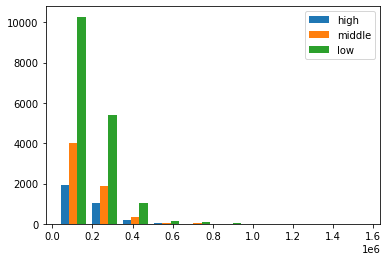

In [24]:
# 신용등급에 따른 income 수준
plt.hist([high.income_total,middle.income_total,low.income_total], bins = 10, label=['high', 'middle','low'])
plt.legend()

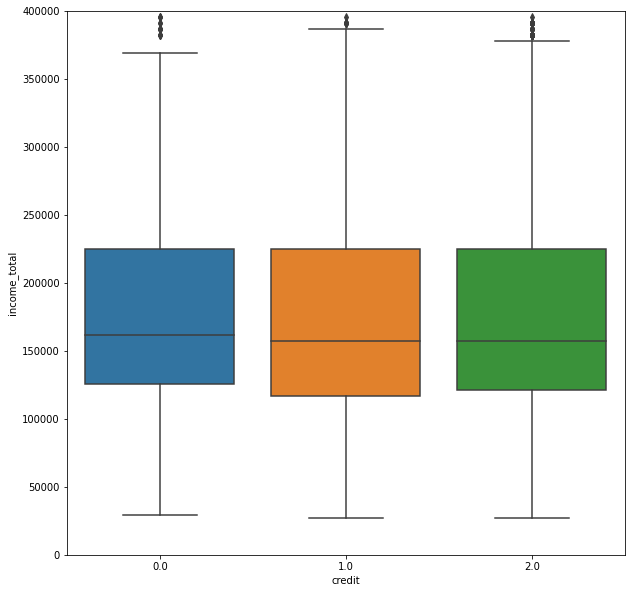

In [65]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='credit', y ='income_total', data = df)
plt.ylim(0,400000);

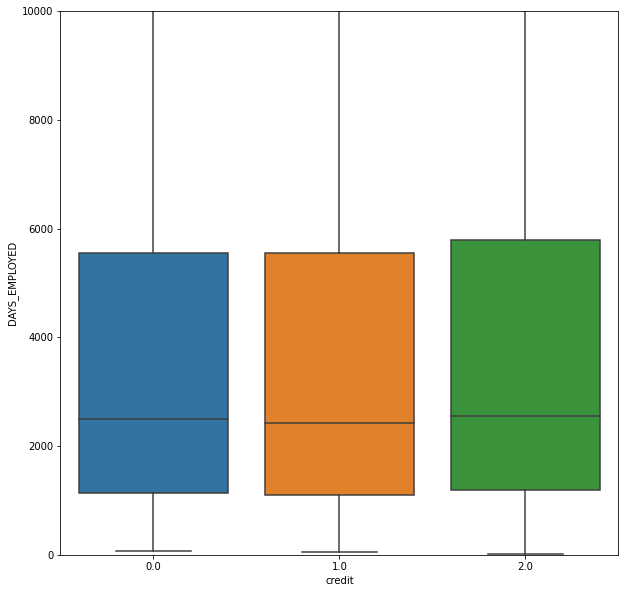

In [70]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='credit', y ='DAYS_EMPLOYED', data = df)
plt.ylim(0,10000);

### 소득타입에 따른 분류

In [26]:
income_type = list(set(df.income_type))
income_type


# state servant - 국정원
# pensioner = 연금수령자

['State servant', 'Student', 'Working', 'Commercial associate', 'Pensioner']

In [28]:
state_servant = df[df.income_type == income_type[0]]
student = df[df.income_type == income_type[1]]
working = df[df.income_type == income_type[2]]
commercial_associate = df[df.income_type == income_type[3]]
pensioner = df[df.income_type == income_type[4]]

(array([ 536.,    0.,    0.,    0.,    0., 1084.,    0.,    0.,    0.,
        2829.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

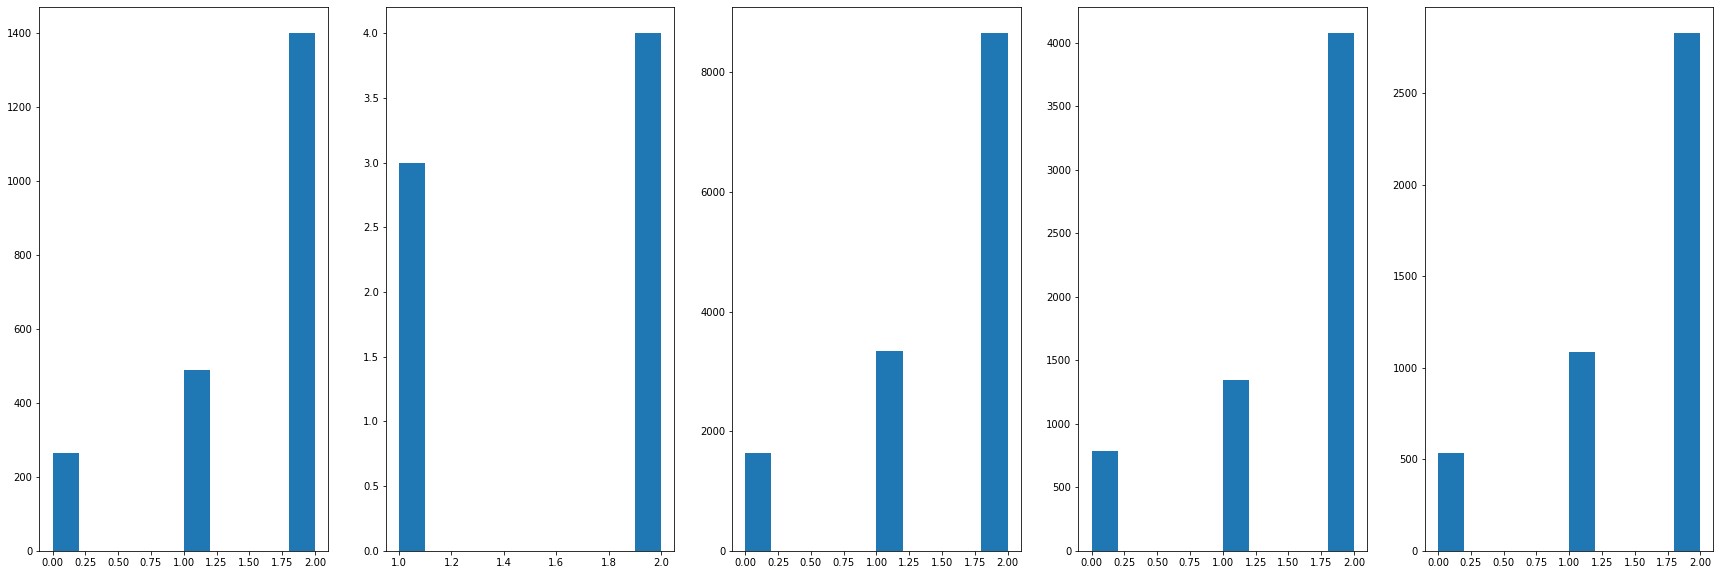

In [37]:
# 소득타입에 따른 신용도
fig, axes = plt.subplots(1,5,figsize=(30,10))
axes[0].hist(state_servant.credit)
axes[1].hist(student.credit)
axes[2].hist(working.credit)
axes[3].hist(commercial_associate.credit)
axes[4].hist(pensioner.credit)

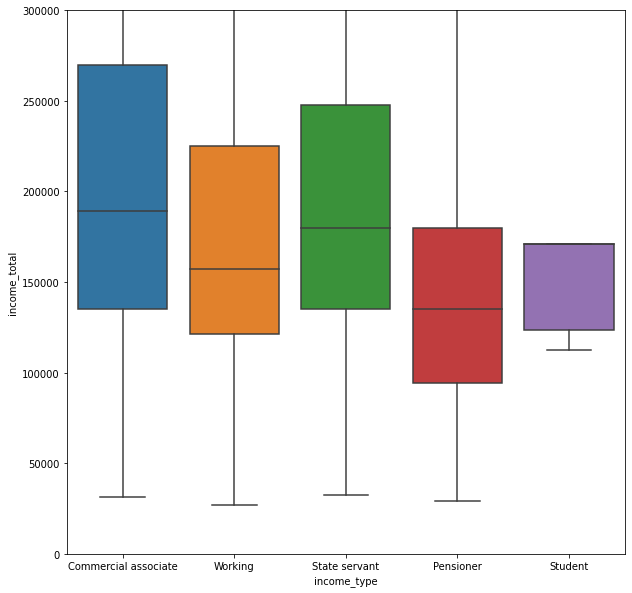

In [74]:
# 소득 타입에 따른 소득수준
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='income_type', y ='income_total', data = df)
plt.ylim(0,300000);

### 교육 수준에 따른 분류

In [39]:
edu_type = list(set(df.edu_type))
edu_type

# academic - 학사
# higher education -고등교육
#secondary - 중등교육

['Higher education',
 'Incomplete higher',
 'Secondary / secondary special',
 'Academic degree',
 'Lower secondary']

In [40]:
academic_degree = df[df.edu_type == edu_type[0]]
higher_education = df[df.edu_type == edu_type[1]]
incomplete_higher = df[df.edu_type == edu_type[2]]
secondary = df[df.edu_type == edu_type[3]]
lower_secondary = df[df.edu_type == edu_type[4]]

(array([ 28.,   0.,   0.,   0.,   0.,  59.,   0.,   0.,   0., 170.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

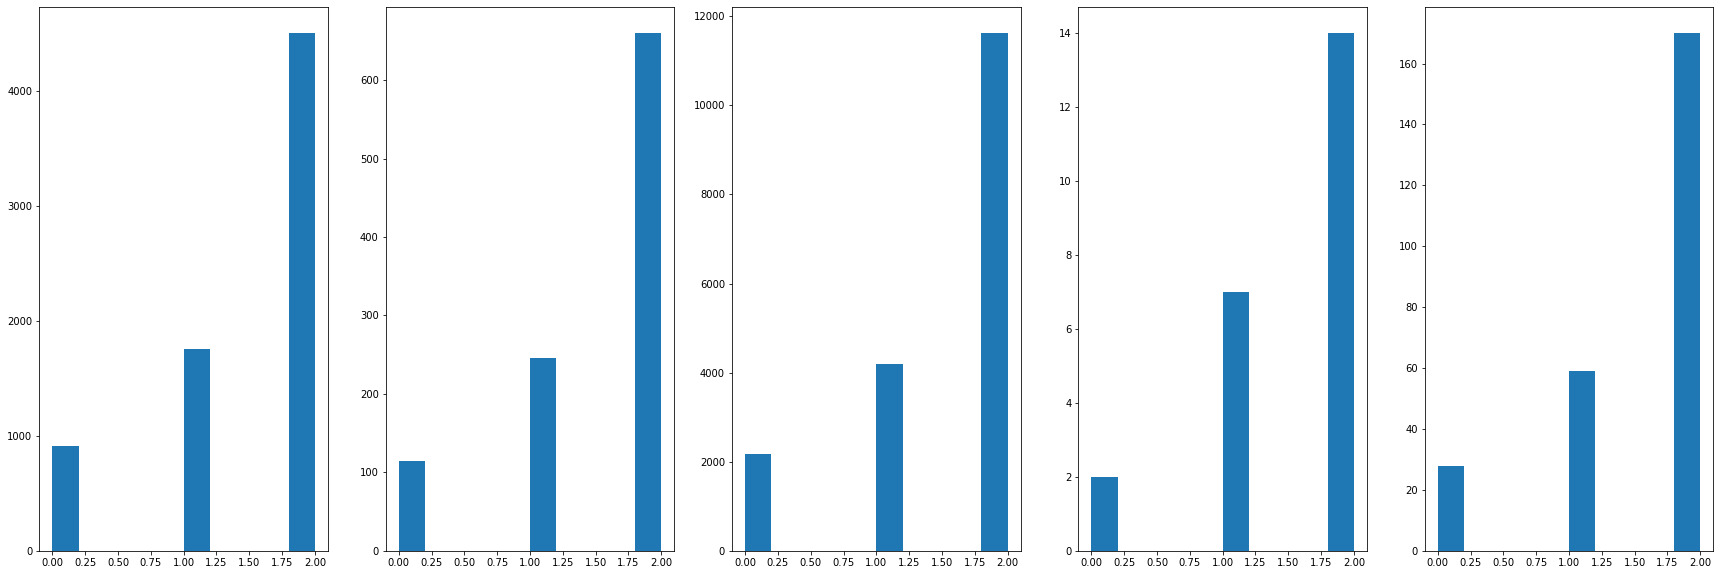

In [41]:
fig, axes = plt.subplots(1,5,figsize=(30,10))
axes[0].hist(academic_degree.credit)
axes[1].hist(higher_education.credit)
axes[2].hist(incomplete_higher.credit)
axes[3].hist(secondary.credit)
axes[4].hist(lower_secondary.credit)

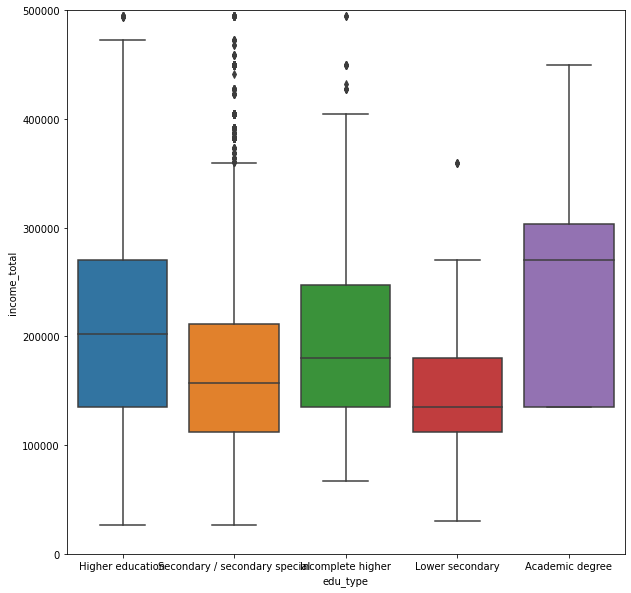

In [76]:
# 교육수준에 따른 소득수준
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='edu_type', y ='income_total', data = df)
plt.ylim(0,500000);

### 가정타입에 따른 분류

In [85]:
family_type = list(set(df.family_type))
family_type

# civil marriage - 법률혼
# seperated - 별거

['Widow', 'Civil marriage', 'Separated', 'Single / not married', 'Married']

In [86]:
widow = df[df.family_type == family_type[0]]
civil_marriage = df[df.family_type == family_type[1]]
separated = df[df.family_type == family_type[2]]
single = df[df.family_type == family_type[3]]
married = df[df.family_type == family_type[4]]

(array([ 2213.,     0.,     0.,     0.,     0.,  4140.,     0.,     0.,
            0., 11843.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

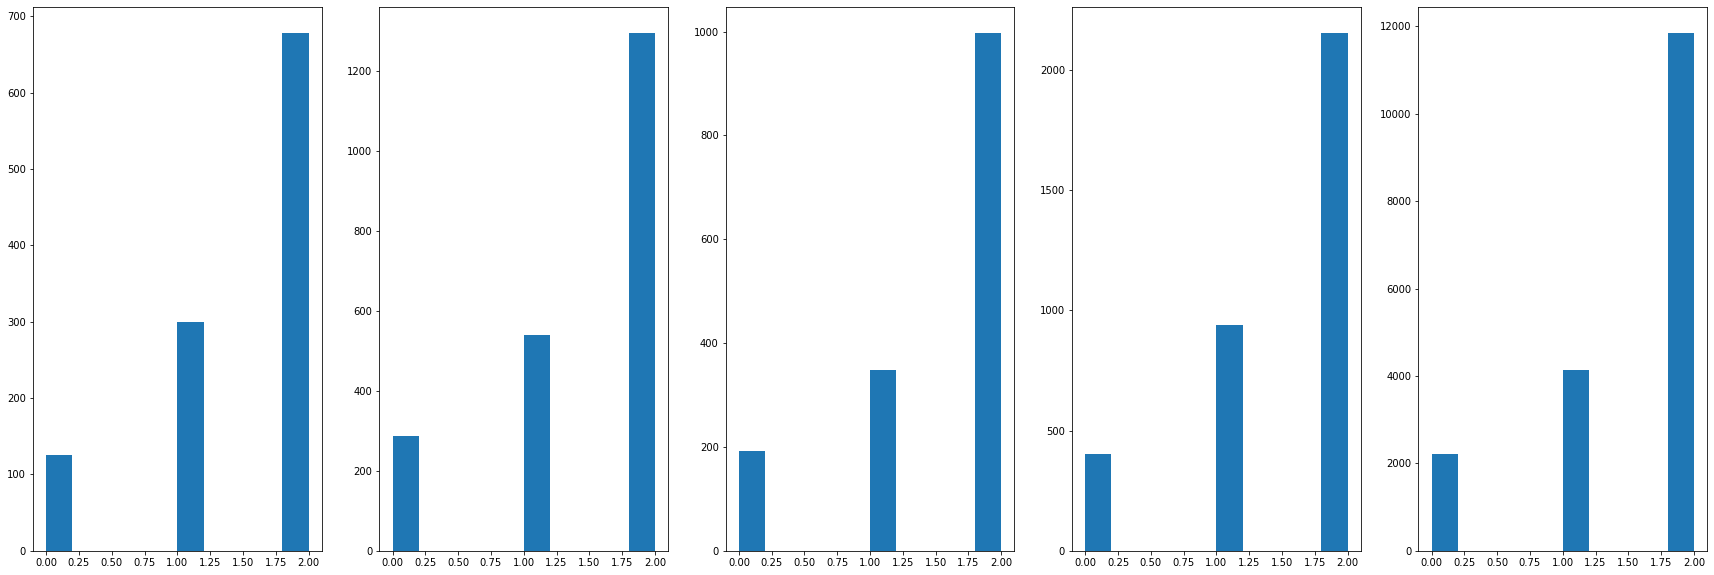

In [87]:
# 가정타입에 따른 신용등급
fig, axes = plt.subplots(1,5,figsize=(30,10))
axes[0].hist(widow.credit)
axes[1].hist(civil_marriage.credit)
axes[2].hist(separated.credit)
axes[3].hist(single.credit)
axes[4].hist(married.credit)

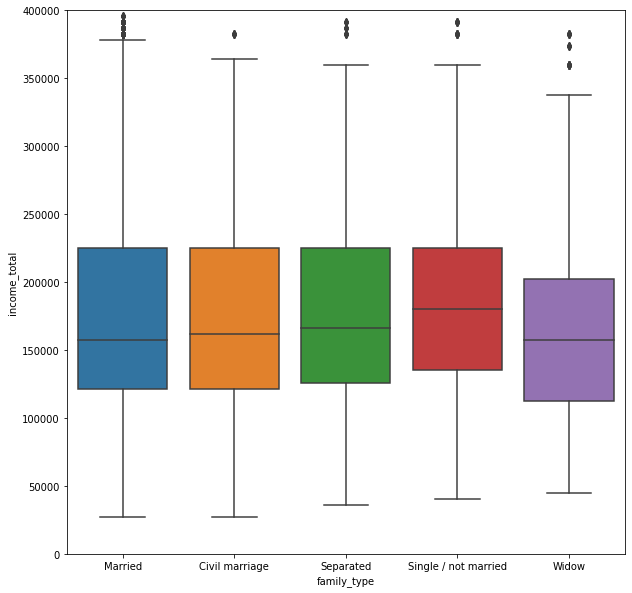

In [88]:
# 가정타입에 따른 소득수준
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='family_type', y ='income_total', data = df)
plt.ylim(0,400000);

### 주거타입에 따른 분류

In [90]:
house_type = list(set(df.house_type))
house_type

#municipal - 시립

['Rented apartment',
 'Office apartment',
 'With parents',
 'Co-op apartment',
 'Municipal apartment',
 'House / apartment']

In [93]:
rented = df[df.house_type == house_type[0]]
office = df[df.house_type == house_type[1]]
with_parent = df[df.house_type == house_type[2]]
co_op = df[df.house_type == house_type[3]]
municipal = df[df.house_type == house_type[4]]
apt = df[df.house_type == house_type[5]]

(array([ 2873.,     0.,     0.,     0.,     0.,  5569.,     0.,     0.,
            0., 15211.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

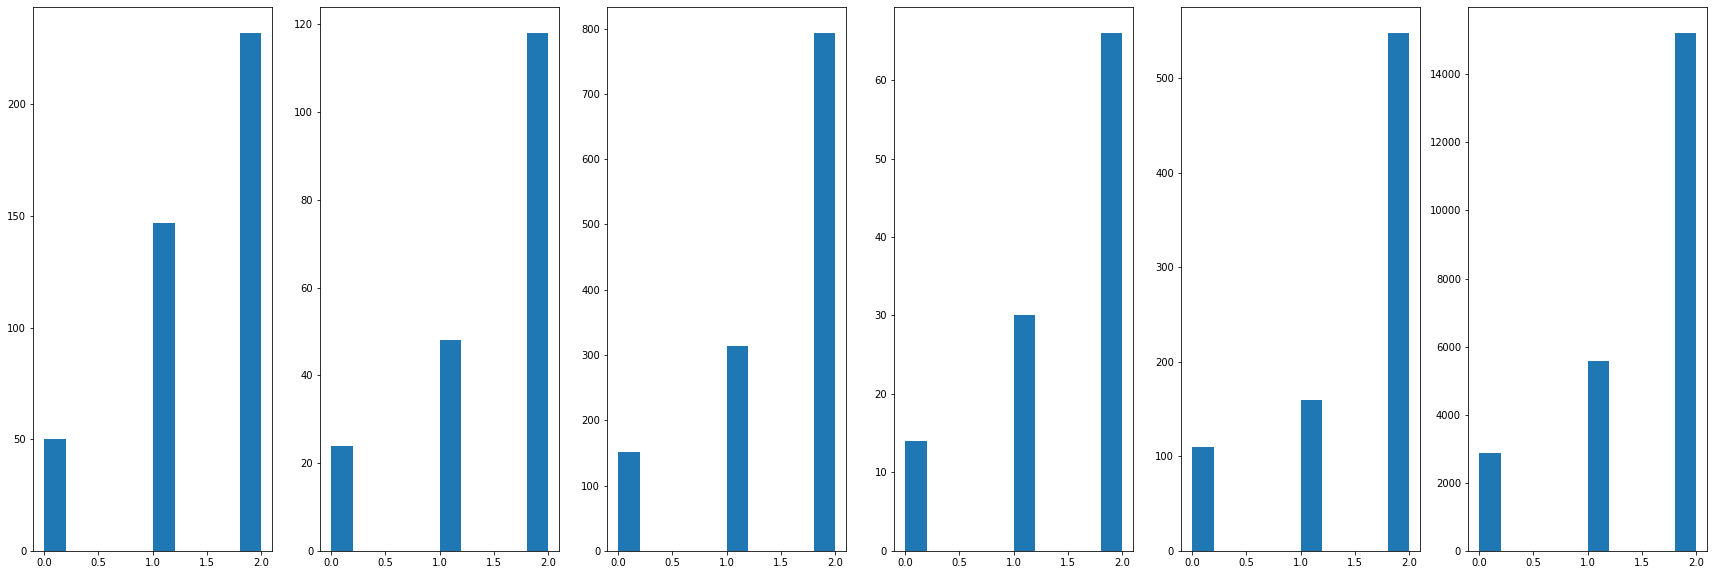

In [94]:
# 주거타입에 따른 신용등급
fig, axes = plt.subplots(1,6,figsize=(30,10))
axes[0].hist(rented.credit)
axes[1].hist(office.credit)
axes[2].hist(with_parent.credit)
axes[3].hist(co_op.credit)
axes[4].hist(municipal.credit)
axes[5].hist(apt.credit)

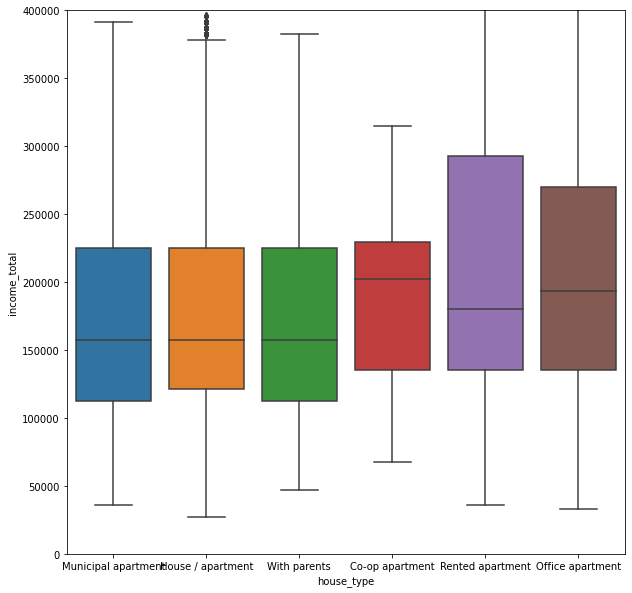

In [95]:
# 주거타입에 따른 소득수준
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='house_type', y ='income_total', data = df)
plt.ylim(0,400000);